# DataFrame

In [1]:
import pandas as pd
import numpy as np

In [10]:
d = {"one":pd.Series([1.0,2.0,3.0],index=["a","b","c"]),"two":pd.Series([1.0,2.0,3.0,4.0],index=["a","b","c","d"])}

In [11]:
df = pd.DataFrame(d)

In [12]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [13]:
pd.DataFrame(d, index=["d","b","a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [14]:
pd.DataFrame(d, index=["d","b","a"],columns=["two","three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [15]:
pd.DataFrame(d, index=["d","b","a"],columns=["one","two","three"])

,one,two,three
d,NaN,4.0,NaN
b,2.0,2.0,NaN
a,1.0,1.0,NaN


In [16]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [17]:
df.columns

Index(['one', 'two'], dtype='object')

## From dict of ndarrays / lists

In [18]:
d = {"one":[1.0,2.0,3.0,4.0],"two":[4.0,3.0,2.0,1.0]}

In [19]:
df = pd.DataFrame(d)

In [20]:
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [21]:
pd.DataFrame(d, index=["a","b","c","d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


## From structured or record array

In [22]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

In [23]:
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [24]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [25]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [26]:
df = pd.DataFrame(data)

In [27]:
df

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [28]:
pd.DataFrame(data, index=["first","second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [29]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


## From a list of dicts

In [30]:
data2 = [{"a":1,"b":2},{"a":5,"b":10,"c":20}]

In [31]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [32]:
pd.DataFrame(data2,index=["first","second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [33]:
pd.DataFrame(data2, columns=["a","b"])

,a,b
0,1,2
1,5,10


## From a dict of tuples

In [2]:
p = pd.DataFrame({("a", "b"): {("A", "B"): 1, ("A", "C"): 2},("a", "a"): {("A", "C"): 3, ("A", "B"): 4},("a", "c"): {("A", "B"): 5, ("A", "C"): 6},("b", "a"): {("A", "C"): 7, ("A", "B"): 8},("b", "b"): {("A", "D"): 9, ("A", "B"): 10},})

In [3]:
p

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [36]:
p.index

MultiIndex([('A', 'B'),
            ('A', 'C'),
            ('A', 'D')],
           )

In [37]:
p.columns

MultiIndex([('a', 'b'),
            ('a', 'a'),
            ('a', 'c'),
            ('b', 'a'),
            ('b', 'b')],
           )

## From a list of namedtuples

In [38]:
from collections import namedtuple

In [39]:
Point = namedtuple("Point", "x y")

In [40]:
pd.DataFrame([Point(0,0), Point(0,3),(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


In [41]:
Point3D = namedtuple("Point3D","x y z")

In [42]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), (2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


## From a list of dataclasses

In [43]:
from dataclasses import make_dataclass

In [44]:
Point = make_dataclass("Point", [("x", int),("y", int)])

In [45]:
pd.DataFrame([Point(0,0), Point(0,3), Point(2,3)])

,0
0,"Point(x=0, y=0)"
1,"Point(x=0, y=3)"
2,"Point(x=2, y=3)"


## Alternate constructors

### DataFrame.from_dict

字典转dataframe，dataframe其实就是一个table二维表

In [46]:
pd.DataFrame.from_dict(dict([("A", [1,2,3]),("B",[4,5,6])]))

,A,B
0,1,4
1,2,5
2,3,6


当orient='index'时，dict中的keys就是dataframe中的行标签

In [47]:
pd.DataFrame.from_dict(dict([("A",[1,2,3]),("B",[4,5,6])]), orient="index", columns=["one","two","three"],)

,one,two,three
A,1,2,3
B,4,5,6


## Column selection, addition, deletion

In [49]:
d = {"one":pd.Series([1.0,2.0,3.0],index=["a","b","c"]),"two":pd.Series([1.0,2.0,3.0,4.0],index=["a","b","c","d"])}

In [50]:
df = pd.DataFrame(d)

In [51]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [52]:
df["three"] = df["one"] * df["two"]

In [53]:
df["flag"] = df["one"] > 2

In [54]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [55]:
del df["two"]

In [56]:
three = df.pop("three")

In [57]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [58]:
df["foo"] = "bar"

In [59]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [60]:
df["one_trunc"] = df["one"][:2]

In [61]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [67]:
df.insert(1, "bars", df["one"])

In [68]:
df

,one,bars,bar,flag,foo,one_trunc
a,1.0,1.0,1.0,False,bar,1.0
b,2.0,2.0,2.0,False,bar,2.0
c,3.0,3.0,3.0,True,bar,NaN
d,NaN,NaN,NaN,False,bar,NaN


## Assigning new columns in method chains

In [10]:
import pandas as pd

In [11]:
iris = pd.read_csv("data/iris.data")

In [17]:
iris.columns=["SepalLength","SepalWidth","PetalLength","PetalWidth","Name"]

In [18]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [19]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
1,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
2,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
3,5.0,3.6,1.4,0.2,Iris-setosa,0.720000
4,5.4,3.9,1.7,0.4,Iris-setosa,0.722222


In [20]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
1,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
2,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
3,5.0,3.6,1.4,0.2,Iris-setosa,0.720000
4,5.4,3.9,1.7,0.4,Iris-setosa,0.722222


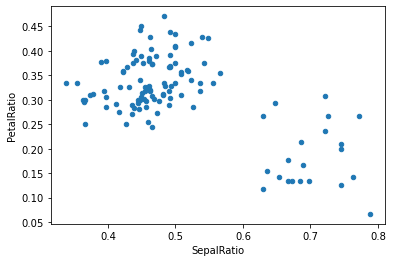

In [23]:
(iris.query("SepalLength > 5").assign(SepalRatio=lambda x: x.SepalWidth / x.SepalLength, PetalRatio=lambda x: x.PetalWidth / x.PetalLength,).plot(kind="scatter", x="SepalRatio", y="PetalRatio"))

## Indexing / selection

![image.png](images/pandas-select.jpg)

In [4]:
d = {"one":pd.Series([1.0,2.0,3.0],index=["a","b","c"]),"two":pd.Series([1.0,2.0,3.0,4.0],index=["a","b","c","d"])}

In [5]:
df = pd.DataFrame(d)

In [6]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [7]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [8]:
df.loc["a"]

one    1.0
two    1.0
Name: a, dtype: float64

In [12]:
df.iloc[2] # index=2

one    3.0
two    3.0
Name: c, dtype: float64

In [13]:
df[1:2]

,one,two
b,2.0,2.0


In [2]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A","B","C","D"])

In [3]:
df2 = pd.DataFrame(np.random.randn(7,3), columns=["A","B","C"])

In [4]:
df + df2

,A,B,C,D
0,-0.163927,3.868308,2.039469,NaN
1,3.528967,-1.426837,-0.418318,NaN
2,1.976093,0.616939,0.137615,NaN
3,-2.424780,-2.333040,0.587058,NaN
4,1.389665,2.598889,0.362861,NaN
5,-0.811668,0.610540,0.840347,NaN
6,-1.571173,2.890586,-2.169857,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [5]:
df["A"]

0    0.451154
1    1.976597
2    1.150852
3   -1.411448
4    1.412643
5    1.311637
6   -0.168673
7    0.376158
8   -0.023549
9    0.417688
Name: A, dtype: float64

In [6]:
df.iloc[0]

A    0.451154
B    3.013397
C   -0.590663
D   -1.782546
Name: 0, dtype: float64

In [7]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.525443,-4.305928,-0.331687,1.321773
2,0.699698,-2.706057,1.433665,2.809080
3,-1.862602,-5.383523,0.722358,1.422861
4,0.961488,-1.891447,0.098038,0.537409
5,0.860483,-2.978767,1.608387,2.865717
6,-0.619828,-0.998091,-0.917322,0.590089
7,-0.074996,-1.928280,-0.398460,2.942596
8,-0.474703,-3.723204,0.912754,0.744570
9,-0.033466,-3.196382,-0.244165,1.261350


In [8]:
df * 5 + 2

,A,B,C,D
0,4.255772,17.066984,-0.953317,-6.912728
1,11.882986,-4.462654,-2.611752,-0.303863
2,7.754262,3.536700,6.215008,7.132671
3,-5.057239,-9.850632,2.658472,0.201578
4,9.063213,7.609748,-0.463128,-4.225681
5,8.558185,2.173149,7.088619,7.415859
6,1.156633,12.076530,-5.539927,-3.962283
7,3.880790,7.425585,-2.945620,7.800251
8,1.882255,-1.549036,3.610451,-3.189876
9,4.088440,1.085074,-2.174145,-0.605977


In [9]:
1/df

,A,B,C,D
0,2.216536,0.331851,-1.693011,-0.560995
1,0.505920,-0.773676,-1.084187,-2.170268
2,0.868921,3.253726,1.186237,0.974152
3,-0.708492,-0.421918,7.593332,-2.780216
4,0.707893,0.891306,-2.029939,-0.803125
5,0.762406,28.876824,0.982585,0.923215
6,-5.928619,0.496203,-0.663136,-0.838605
7,2.658457,0.921560,-1.010996,0.862032
8,-42.464765,-1.408833,3.104721,-0.963414
9,2.394131,-5.464924,-1.197850,-1.918667


In [10]:
df ** 4

,A,B,C,D
0,4.142864e-02,82.456586,0.121720,10.096308
1,1.526415e+01,2.791023,0.723742,0.045076
2,1.754197e+00,0.008922,0.505026,1.110436
3,3.968801e+00,31.556295,0.000301,0.016737
4,3.982257e+00,1.584504,0.058894,2.403629
5,2.959748e+00,0.000001,1.072802,1.376541
6,8.094421e-04,16.495441,5.171167,2.021949
7,2.002081e-02,1.386457,0.957200,1.810952
8,3.075283e-07,0.253841,0.010762,1.160775
9,3.043745e-02,0.001121,0.485724,0.073791


布尔操作

In [13]:
df3 = pd.DataFrame({"a":[1,0,1],"b":[0,1,1]}, dtype=bool)

In [14]:
df4 = pd.DataFrame({"a":[0,1,1],"b":[1,1,0]}, dtype=bool)

In [15]:
df3 & df4

,a,b
0,False,False
1,False,True
2,True,False


In [16]:
df3 | df4

,a,b
0,True,True
1,True,True
2,True,True


In [17]:
df3 ^ df4

,a,b
0,True,True
1,True,False
2,False,True


In [18]:
-df3

,a,b
0,False,True
1,True,False
2,False,False


## Transposing转置

第[0-5)行的转置

In [19]:
df[:5].T

,0,1,2,3,4
A,0.451154,1.976597,1.150852,-1.411448,1.412643
B,3.013397,-1.292531,0.307340,-2.370126,1.121950
C,-0.590663,-0.922350,0.843002,0.131694,-0.492626
D,-1.782546,-0.460773,1.026534,-0.359684,-1.245136


## DataFrame interoperability with NumPy functions  
## DataFrame与Numpy的转换操作

In [20]:
np.exp(df)

,A,B,C,D
0,1.570124,20.356431,0.553960,0.168209
1,7.218139,0.274575,0.397583,0.630796
2,3.160886,1.359803,2.323330,2.791375
3,0.243790,0.093469,1.140760,0.697897
4,4.106794,3.070835,0.611020,0.287902
5,3.712246,1.035236,2.766889,2.954034
6,0.844785,7.503022,0.221355,0.303475
7,1.456677,2.959786,0.371902,3.190093
8,0.976726,0.491739,1.380009,0.354171
9,1.518447,0.832781,0.433949,0.593810


In [21]:
np.asarray(df)

array([[ 0.45115437,  3.0133969 , -0.59066348, -1.78254561],
       [ 1.9765972 , -1.2925307 , -0.9223504 , -0.46077251],
       [ 1.15085232,  0.30733998,  0.84300162,  1.02653422],
       [-1.4114478 , -2.37012637,  0.13169449, -0.35968431],
       [ 1.4126427 ,  1.12194959, -0.49262553, -1.24513618],
       [ 1.31163709,  0.03462985,  1.01772371,  1.08317175],
       [-0.16867334,  2.01530594, -1.50798538, -1.19245653],
       [ 0.37615808,  1.08511708, -0.98912396,  1.16005011],
       [-0.02354894, -0.70980725,  0.32209011, -1.03797519],
       [ 0.41768806, -0.18298516, -0.83482891, -0.52119531]])

In [22]:
ser = pd.Series([1,2,3,4])

In [23]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [24]:
ser1 = pd.Series([1,2,3], index=["a","b","c"])

In [25]:
ser2 = pd.Series([1,3,5], index=["b","a","c"])

In [26]:
ser1

a    1
b    2
c    3
dtype: int64

In [27]:
ser2

b    1
a    3
c    5
dtype: int64

In [28]:
np.remainder(ser1,ser2)

a    1
b    0
c    3
dtype: int64

In [29]:
ser3 = pd.Series([2,4,6], index=["b","c","d"])

In [30]:
ser3

b    2
c    4
d    6
dtype: int64

取两个索引的并集，用缺失的值填充不重叠的值

In [31]:
np.remainder(ser1,ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

In [32]:
ser4 = pd.Series([1,2,3])

In [33]:
idx = pd.Index([4,5,6])

In [35]:
np.maximum(ser4, idx)

0    4
1    5
2    6
dtype: int64

## Console display

DataFrame可以使用 info()函数在控制台显示数据信息

In [3]:
baseball = pd.read_csv("data/baseball.csv")

In [4]:
baseball

,Unnamed: 0,id,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,4,ansonca01,1871,1,RC1,NaN,25,120,29,39,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
1,44,forceda01,1871,1,WS3,NaN,32,162,45,45,...,29.0,8.0,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,68,mathebo01,1871,1,FW1,NaN,19,89,15,24,...,10.0,2.0,1.0,2,0.0,NaN,NaN,NaN,NaN,NaN
3,99,startjo01,1871,1,NY2,NaN,33,161,35,58,...,34.0,4.0,2.0,3,0.0,NaN,NaN,NaN,NaN,NaN
4,102,suttoez01,1871,1,CL1,NaN,29,128,35,45,...,23.0,3.0,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21694,89525,benitar01,2007,2,FLO,NL,34,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
21695,89526,benitar01,2007,1,SFN,NL,19,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
21696,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
21697,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0


In [5]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21699 entries, 0 to 21698
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  21699 non-null  int64  
 1   id          21699 non-null  object 
 2   year        21699 non-null  int64  
 3   stint       21699 non-null  int64  
 4   team        21699 non-null  object 
 5   lg          21634 non-null  object 
 6   g           21699 non-null  int64  
 7   ab          21699 non-null  int64  
 8   r           21699 non-null  int64  
 9   h           21699 non-null  int64  
 10  X2b         21699 non-null  int64  
 11  X3b         21699 non-null  int64  
 12  hr          21699 non-null  int64  
 13  rbi         21687 non-null  float64
 14  sb          21449 non-null  float64
 15  cs          17174 non-null  float64
 16  bb          21699 non-null  int64  
 17  so          20394 non-null  float64
 18  ibb         14171 non-null  float64
 19  hbp         21322 non-nul

In [9]:
print(baseball.iloc[-20:, :12].to_string()) # 得使用print打印不然输出格式会乱

       Unnamed: 0         id  year  stint team  lg    g   ab   r    h  X2b  X3b
21679       89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0
21680       89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0
21681       89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2
21682       89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0
21683       89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0
21684       89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0
21685       89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0
21686       89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1
21687       89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0
21688       89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0
21689       89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0
21690       89501  cirilje01  2007      

In [10]:
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.356301,-0.811703,-0.339734,0.679008,0.435649,-0.673824,-1.027173,-0.523488,0.945855,0.699474,0.631644,-0.366959
1,-1.079357,0.153814,2.032300,1.436400,0.792314,0.576597,-0.229595,-0.914742,0.112159,0.369045,0.773939,-0.359335
2,-0.031373,-0.983353,0.494200,-0.133841,-1.046705,1.061739,-0.724143,0.787673,0.670694,0.081685,0.361772,0.403722


In [11]:
pd.set_option("display.width", 40)

In [12]:
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.097405,-0.873292,0.949613,-1.532680,-1.331975,-0.447027,0.624773,1.012693,-0.784737,1.234987,-0.020180,-0.518555
1,1.438872,0.712743,-1.187085,-0.630681,-0.021606,-0.566181,-1.383838,-2.526978,-1.054924,0.669882,1.096694,-0.322706
2,-0.586614,1.411454,0.576119,1.735247,-1.841907,1.105774,0.912652,0.687109,0.705488,0.285434,1.324587,1.457092


In [13]:
df = pd.DataFrame({"foo1":np.random.randn(5), "foo2":np.random.randn(5)})

In [14]:
df

,foo1,foo2
0,-1.333687,-1.472166
1,0.779133,2.057882
2,0.928089,-0.896564
3,-0.755934,-0.036629
4,-1.930917,-0.101799


In [15]:
df.foo1

0   -1.333687
1    0.779133
2    0.928089
3   -0.755934
4   -1.930917
Name: foo1, dtype: float64

In [17]:
df.foo2

0   -1.472166
1    2.057882
2   -0.896564
3   -0.036629
4   -0.101799
Name: foo2, dtype: float64